Workintech Data Analizi Bitirme Projesi

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
products = pd.read_csv(r"C:\Users\rabia\Project_workintech\Workintech_data_analysis_graduation_project\data\products.csv")

In [4]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260 entries, 0 to 1259
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product_ID    1260 non-null   int64 
 1   product_type  1260 non-null   object
 2   product_name  1260 non-null   object
 3   size          1260 non-null   object
 4   colour        1260 non-null   object
 5   price         1260 non-null   int64 
 6   quantity      1260 non-null   int64 
 7   description   1260 non-null   object
dtypes: int64(3), object(5)
memory usage: 78.9+ KB


In [6]:
products.head()

,product_ID,product_type,product_name,size,colour,price,quantity,description
0,0,Shirt,Oxford Cloth,XS,red,114,66,"A red coloured, XS sized, Oxford Cloth Shirt"
1,1,Shirt,Oxford Cloth,S,red,114,53,"A red coloured, S sized, Oxford Cloth Shirt"
2,2,Shirt,Oxford Cloth,M,red,114,54,"A red coloured, M sized, Oxford Cloth Shirt"
3,3,Shirt,Oxford Cloth,L,red,114,69,"A red coloured, L sized, Oxford Cloth Shirt"
4,4,Shirt,Oxford Cloth,XL,red,114,47,"A red coloured, XL sized, Oxford Cloth Shirt"


In [18]:
products['product_type'].value_counts()

product_type
Shirt       420
Jacket      420
Trousers    420
Name: count, dtype: int64

In [8]:
products.isna().sum()

product_ID      0
product_type    0
product_name    0
size            0
colour          0
price           0
quantity        0
description     0
dtype: int64

In [10]:
q1 = products['price'].quantile(0.25)  # 1. çeyrek
q3 = products['price'].quantile(0.75)  # 3. çeyrek
iqr = q3 - q1                          # aralık

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers_price = products[(products['price'] < lower_bound) | (products['price'] > upper_bound)]
print(len(outliers_price))

0


In [15]:
dup_count = products.duplicated(subset=['product_ID']).sum()
dup_count 

0

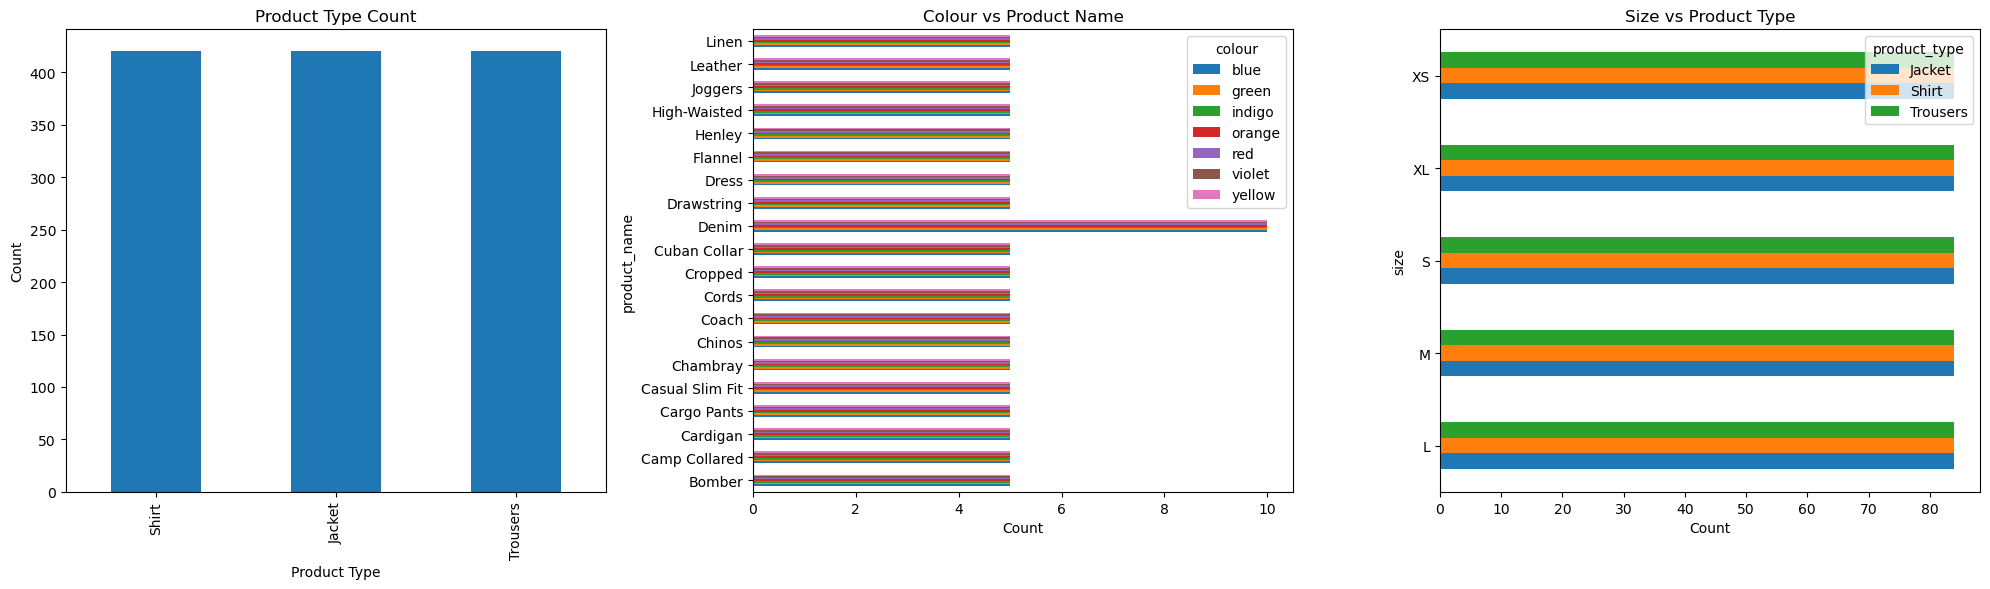

In [57]:
fig, axes = plt.subplots(1,3, figsize=(20,6))

# 1) Product Type Count
products['product_type'].value_counts().plot(kind='bar', ax=axes[0])
axes[0].set_title("Product Type Count")
axes[0].set_xlabel("Product Type")
axes[0].set_ylabel("Count")

# 2) Product Name vs Colour 
products.groupby(['colour','product_name'])['product_ID'].count().unstack().fillna(0).T.head(20).plot(kind="barh", ax=axes[1])
axes[1].set_title("Colour vs Product Name")
axes[1].set_xlabel("Count")

# 3) Product Type vs Size
products.groupby(['product_type','size'])['product_ID'].count().unstack().fillna(0).T.plot(kind="barh", ax=axes[2])
axes[2].set_title("Size vs Product Type")
axes[2].set_xlabel("Count")

plt.tight_layout()
plt.show()



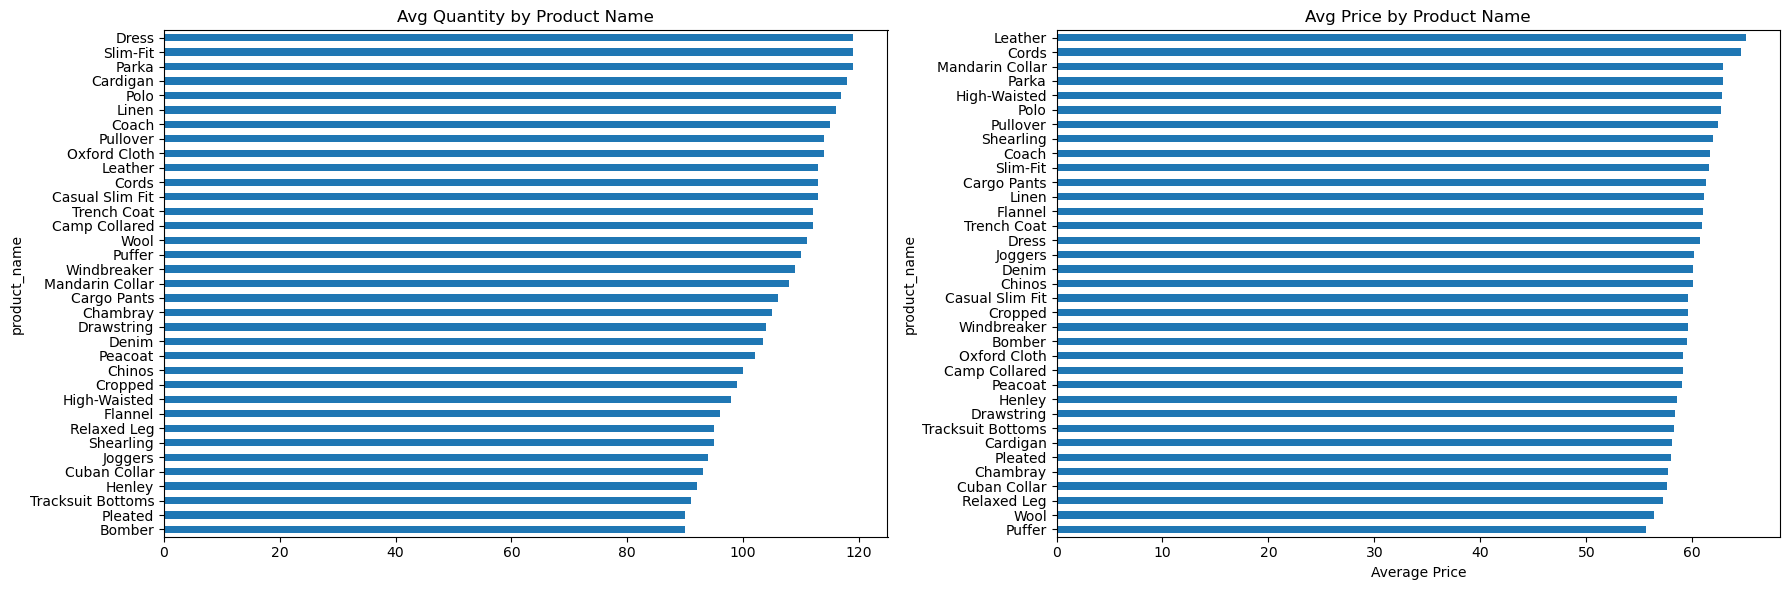

In [64]:

top_names = products['product_name'].value_counts().index

fig, axes = plt.subplots(1,2, figsize=(18,6))

products[products['product_name'].isin(top_names)].groupby('product_name')['quantity'].mean().sort_values().plot(kind='barh', ax=axes[1])
axes[0].set_title("Avg Quantity by Product Name")
axes[0].set_xlabel("Average Quantity")

products[products['product_name'].isin(top_names)].groupby('product_name')['price'].mean().sort_values().plot(kind='barh', ax=axes[0])
axes[1].set_title("Avg Price by Product Name")
axes[1].set_xlabel("Average Price")

plt.tight_layout()
plt.show()